In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

# Dataset: Student Mobility

In [95]:
df_mobility = pd.read_csv("https://raw.githubusercontent.com/teriolx/vds-datasets/main/mobile_students_from_abroad_in_europe.csv")

In [96]:
df_mobility.shape

(947296, 7)

In [97]:
df_mobility.head()

,unit,isced11,isced13,sex,geo,year,value
0,NR,ED5,F00,F,AT,2019,0.0
1,NR,ED5,F00,F,BA,2019,NaN
2,NR,ED5,F00,F,BE,2019,0.0
3,NR,ED5,F00,F,BG,2019,NaN
4,NR,ED5,F00,F,CH,2019,0.0


In [98]:
# drop useless column
print(len(df_mobility["unit"].unique()))
df_mobility.drop("unit", axis="columns", inplace=True)

1


In [99]:
df_mobility.count()

isced11    947296
isced13    947296
sex        947296
geo        947296
year       947296
value      564484
dtype: int64

There are a lot of missing values for the `value` observation, which is the target variable we are observing. Therefore, we drop the rows with the NANs in the `value` column.  

In [100]:
df_mobility.dropna(inplace=True)

In [101]:
df_mobility.shape

(564484, 6)

In [102]:
df_mobility.dtypes

isced11     object
isced13     object
sex         object
geo         object
year         int64
value      float64
dtype: object

## GEO

This variable describes the location of the observation. The values are country codes which values are obtained from the countries to country codes [mapping](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes).

In [103]:
df_mobility["geo"].sort_values().unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LI', 'LT', 'LU', 'LV', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [104]:
geo_map = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CH": "Switzerland",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DK": "Denmark",
    "EE": "Estonia",
    "EL": "Greece",
    "ES": "Spain",
    "FI": "Finland",
    "FR": "France",
    "HR": "Croatia",
    "HU": "Hungary",
    "IE": "Ireland",
    "IS": "Iceland",
    "IT": "Italy",
    "LI": "Liechtenstein",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "MK": "North Macedonia",
    "MT": "Malta",
    "NL": "Netherlands",
    "NO": "Norway",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "RS": "Serbia",
    "SE": "Sweden",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "TR": "Turkey",
    "UK": "United Kingdom"
    }

In [105]:
geo_dropped_count = sum((df_mobility["geo"] == "EU27_2020") | (df_mobility["geo"] == "EU28"))
geo_count = df_mobility["geo"].count()
df_mobility["geo"] = df_mobility["geo"].map(geo_map)

In [106]:
assert df_mobility["geo"].count() == geo_count - geo_dropped_count

In [107]:
df_mobility.dropna(inplace=True)

We drop the rows with NaN values in the feature resulting from the mapping. Since the mapping does not include the country groups `EU27_2020` and `EU28`, we aim to combine this dataset with the ranking of universities dataset. Therefore, we keep the observations per country only.

In [108]:
df_mobility.shape

(546739, 6)

In [109]:
df_mobility["geo"].head()

0           Austria
2           Belgium
4       Switzerland
5            Cyprus
6    Czech Republic
Name: geo, dtype: object

We transform the country codes into their full names based on the available resource and minding the values in the `df_rating` dataset presented in the later section so that these match and can be combined later.

In [110]:
df_mobility[df_mobility["geo"] == "Liechtenstein"]

,isced11,isced13,sex,geo,year,value
21,ED5,F00,F,Liechtenstein,2019,0.0
59,ED5,F00,M,Liechtenstein,2019,0.0
97,ED5,F00,T,Liechtenstein,2019,0.0
135,ED5,F000,F,Liechtenstein,2019,0.0
173,ED5,F000,M,Liechtenstein,2019,0.0
...,...,...,...,...,...,...
828719,ED8,TOTAL,M,Liechtenstein,2013,45.0
828756,ED8,TOTAL,T,Liechtenstein,2013,61.0
828793,ED8,UNK,F,Liechtenstein,2013,0.0
828830,ED8,UNK,M,Liechtenstein,2013,0.0


## ISCED11

In [111]:
df_mobility["isced11"].unique()

array(['ED5', 'ED5-8', 'ED6', 'ED7', 'ED8'], dtype=object)

In [112]:
df_mobility[df_mobility["isced11"] == "ED5-8"]

,isced11,isced13,sex,geo,year,value
24660,ED5-8,F00,F,Austria,2019,0.0
24661,ED5-8,F00,F,Belgium,2019,0.0
24662,ED5-8,F00,F,Bulgaria,2019,0.0
24663,ED5-8,F00,F,Switzerland,2019,0.0
24664,ED5-8,F00,F,Cyprus,2019,0.0
...,...,...,...,...,...,...
757948,ED5-8,UNK,T,Turkey,2013,0.0
757949,ED5-8,UNK,T,United Kingdom,2013,1955.0
876216,ED5-8,TOTAL,T,Bulgaria,2012,11214.0
876217,ED5-8,TOTAL,T,Switzerland,2012,44468.0


## ISCED13

TODO

- `UNK` for unknown?
- `TOTAL` meaning?

In [113]:
df_mobility["isced13"].unique()

array(['F00', 'F000', 'F001', 'F002', 'F003', 'F009', 'F01', 'F011',
       'F0110', 'F0111', 'F0112', 'F0113', 'F0114', 'F0119', 'F018',
       'F02', 'F020', 'F021', 'F0210', 'F0211', 'F0212', 'F0213', 'F0214',
       'F0215', 'F0219', 'F022', 'F0220', 'F0221', 'F0222', 'F0223',
       'F0229', 'F023', 'F0230', 'F0231', 'F0232', 'F0239', 'F028',
       'F029', 'F03', 'F030', 'F031', 'F0310', 'F0311', 'F0312', 'F0313',
       'F0314', 'F0319', 'F032', 'F0320', 'F0321', 'F0322', 'F0329',
       'F038', 'F039', 'F04', 'F040', 'F041', 'F0410', 'F0411', 'F0412',
       'F0413', 'F0414', 'F0415', 'F0416', 'F0417', 'F0419', 'F042',
       'F048', 'F049', 'F05', 'F050', 'F051', 'F0510', 'F0511', 'F0512',
       'F0519', 'F052', 'F0520', 'F0521', 'F0522', 'F0529', 'F053',
       'F0530', 'F0531', 'F0532', 'F0533', 'F0539', 'F054', 'F0540',
       'F0541', 'F0542', 'F058', 'F059', 'F06', 'F061', 'F0610', 'F0611',
       'F0612', 'F0613', 'F0619', 'F068', 'F07', 'F070', 'F071', 'F0710',
       

In [114]:
len(df_mobility["isced13"].unique())

218

In [115]:
tmp = df_mobility[df_mobility["isced13"] != "TOTAL"]
tmp[tmp["isced11"] == "ED5-8"]

,isced11,isced13,sex,geo,year,value
24660,ED5-8,F00,F,Austria,2019,0.0
24661,ED5-8,F00,F,Belgium,2019,0.0
24662,ED5-8,F00,F,Bulgaria,2019,0.0
24663,ED5-8,F00,F,Switzerland,2019,0.0
24664,ED5-8,F00,F,Cyprus,2019,0.0
...,...,...,...,...,...,...
757945,ED5-8,UNK,T,Sweden,2013,21.0
757946,ED5-8,UNK,T,Slovenia,2013,0.0
757947,ED5-8,UNK,T,Slovakia,2013,0.0
757948,ED5-8,UNK,T,Turkey,2013,0.0


## SEX

In [116]:
df_mobility["sex"].unique()

array(['F', 'M', 'T'], dtype=object)

In [117]:
tmp = df_mobility[df_mobility["sex"] == "T"]
tmp[tmp["value"] > 0]

,isced11,isced13,sex,geo,year,value
94,ED5,F00,T,Ireland,2019,206.0
113,ED5,F00,T,United Kingdom,2019,928.0
227,ED5,F000,T,United Kingdom,2019,928.0
430,ED5,F001,T,Ireland,2019,28.0
652,ED5,F002,T,Ireland,2019,81.0
...,...,...,...,...,...,...
876217,ED5-8,TOTAL,T,Switzerland,2012,44468.0
876220,ED5-8,TOTAL,T,Germany,2012,184594.0
947150,ED8,TOTAL,T,Bulgaria,2012,150.0
947151,ED8,TOTAL,T,Switzerland,2012,11122.0


## VALUE

In [118]:
df_mobility[df_mobility["value"] > 0].shape

(239585, 6)

## YEAR

In [119]:
sorted(df_mobility["year"].unique())

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Dataset: University Ranking

In [120]:
rankings = []

# take only years 2012-2019
for year in range(2012, 2020):
  data = pd.read_csv(f"https://raw.githubusercontent.com/teriolx/vds-datasets/main/rankings/{year}_rankings.csv")
  data["year"] = year
  rankings.append(data)

df_ranking = pd.concat(rankings, ignore_index=True)

In [121]:
df_ranking.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,location,aliases,subjects_offered,closed,unaccredited,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
0,1,1,California Institute of Technology,94.8,1,95.7,2,56.0,172,97.0,...,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2012,NaN,NaN,NaN,NaN
1,2,2,Harvard University,93.9,2,95.8,1,67.5,115,35.9,...,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2012,NaN,NaN,NaN,NaN
2,2,2,Stanford University,93.9,3,94.8,3,57.2,162,63.8,...,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2012,NaN,NaN,NaN,NaN
3,4,4,University of Oxford,93.6,4,89.5,8,91.9,12,62.1,...,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2012,NaN,NaN,NaN,NaN
4,5,5,Princeton University,92.9,5,91.5,6,49.6,198,81.0,...,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2012,NaN,NaN,NaN,NaN


In [122]:
df_ranking.shape

(5745, 25)

## Variable Types

In [123]:
df_ranking.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
scores_industry_income                object
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
aliases                               object
subjects_offered                      object
closed                                  bool
unaccredited                            bool
year                                   int64
stats_number_students                 object
stats_stud

### `scores_overall`

In [124]:
df_ranking["scores_overall"].unique()

array(['94.8', '93.9', '93.6', '92.9', '92.4', '92.3', '90.7', '90.2',
       '89.8', '89.1', '87.5', '87.3', '85.8', '85.0', '84.9', '83.2',
       '82.8', '81.6', '80.5', '78.4', '77.4', '77.0', '76.5', '76.2',
       '75.8', '75.5', '74.9', '74.3', '74.2', '73.1', '73.0', '72.3',
       '72.1', '72.0', '71.9', '71.2', '70.9', '70.5', '70.0', '69.3',
       '69.0', '67.6', '66.3', '66.0', '65.7', '65.6', '64.9', '64.8',
       '64.6', '64.2', '64.0', '63.2', '63.0', '62.4', '62.0', '61.9',
       '61.7', '61.5', '61.1', '61.0', '60.9', '60.8', '60.4', '60.3',
       '59.6', '59.5', '59.0', '58.7', '58.6', '57.4', '57.3', '57.0',
       '56.9', '56.8', '56.4', '56.0', '55.7', '55.4', '55.2', '55.1',
       '55.0', '54.9', '54.8', '54.7', '54.6', '54.5', '54.4', '54.2',
       '54.0', '53.9', '53.7', '53.6', '53.4', '53.2', '53.1', '53.0',
       '52.9', '52.8', '52.6', '52.5', '52.2', '52.1', '51.9', '51.4',
       '51.3', '51.2', '51.1', '51.0', '50.8', '50.4', '50.2', '50.1',
      

In [125]:
df_ranking[df_ranking["scores_overall"] == '-']

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,location,aliases,subjects_offered,closed,unaccredited,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
200,201,201-225,Université Libre de Bruxelles,-,313,23.6,308,80.4,57,52.8,...,Belgium,Université Libre de Bruxelles,"Architecture,Civil Engineering,Physics & Astro...",False,False,2012,NaN,NaN,NaN,NaN
201,201,201-225,Ulm University,-,311,40.8,142,50.8,194,69.8,...,Germany,Ulm University,"Education,Physics & Astronomy,Chemical Enginee...",False,False,2012,NaN,NaN,NaN,NaN
202,201,201-225,University of Waterloo,-,385,35.8,182,62.1,146,32.7,...,Canada,University of Waterloo,"Biological Sciences,Geography,Other Health,Geo...",False,False,2012,NaN,NaN,NaN,NaN
203,201,201-225,University at Buffalo,-,314,44.3,118,49.2,202,40.9,...,United States,University at Buffalo,"Architecture,Communication & Media Studies,Edu...",False,False,2012,NaN,NaN,NaN,NaN
204,201,201-225,Umeå University,-,312,20.8,333,52.0,189,26.3,...,Sweden,Umeå University,"Art, Performing Arts & Design,Computer Science...",False,False,2012,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,351,351-400,University of Bari Aldo Moro,-,301,29.1,278,38.1,313,35.2,...,Italy,University of Bari Aldo Moro,"Business & Management,Veterinary Science,Commu...",False,False,2015,NaN,NaN,NaN,NaN
1599,351,351-400,University of Minho,-,340,20.2,376,49.7,241,44.5,...,Portugal,University of Minho,"Medicine & Dentistry,Mathematics & Statistics,...",False,False,2015,NaN,NaN,NaN,NaN
1600,351,351-400,National Taiwan University of Science and Tech...,-,259,27.7,299,26.7,379,82.0,...,Taiwan,National Taiwan University of Science and Tech...,"Computer Science,Business & Management,Archite...",False,False,2015,NaN,NaN,NaN,NaN
1601,351,351-400,Curtin University,-,222,20.1,377,91.3,11,36.1,...,Australia,Curtin University Curtin,"History, Philosophy & Theology,Civil Engineeri...",False,False,2015,NaN,NaN,NaN,NaN


In [126]:
df_ranking["scores_overall"] = df_ranking["scores_overall"].replace({r'(.*\..*)[-—–](.*\..*)' : r'\1', '-': np.NaN}, regex=True).astype(np.float64)

In [127]:
df_ranking["scores_industry_income"] = df_ranking["scores_industry_income"].replace({"-": np.NaN}).astype(np.float64)

In [128]:
df_ranking["location"].sort_values().unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Northern Cyprus',
       'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Tanzania'

In [129]:
df_ranking.drop(["rank_order", "rank", "name", "aliases", "subjects_offered", "closed", "unaccredited", "stats_number_students", "stats_student_staff_ratio", "stats_pc_intl_students", "stats_female_male_ratio"], axis="columns", inplace=True)

In [130]:
df_ranking.dtypes

scores_overall                       float64
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
year                                   int64
dtype: object

In [131]:
df_ranking.count()

scores_overall                       4943
scores_overall_rank                  5745
scores_teaching                      5745
scores_teaching_rank                 5745
scores_international_outlook         5745
scores_international_outlook_rank    5745
scores_industry_income               5623
scores_industry_income_rank          5745
scores_research                      5745
scores_research_rank                 5745
scores_citations                     5745
scores_citations_rank                5745
location                             5745
year                                 5745
dtype: int64

## Filter only EU countries

In [132]:
df_ranking = df_ranking[df_ranking["location"].isin(geo_map.values())]

In [133]:
df_ranking.shape

(2310, 14)

In [134]:
df_ranking.set_index(["year", "location"], inplace=True)

In [135]:
df_ranking.count()

scores_overall                       1926
scores_overall_rank                  2310
scores_teaching                      2310
scores_teaching_rank                 2310
scores_international_outlook         2310
scores_international_outlook_rank    2310
scores_industry_income               2287
scores_industry_income_rank          2310
scores_research                      2310
scores_research_rank                 2310
scores_citations                     2310
scores_citations_rank                2310
dtype: int64

In [136]:
df_ranking.index.get_level_values(0)

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='year', length=2310)

In [137]:
df_ranking.loc[2019]

,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank
location,,,,,,,,,,,,
United Kingdom,96.0,10,91.8,5,96.3,19,67.0,157,99.5,1,99.1,14
United Kingdom,94.8,20,92.1,3,94.3,39,52.9,269,98.8,2,97.1,37
United Kingdom,90.3,90,85.8,13,97.1,15,67.3,154,87.7,18,97.8,31
Switzerland,89.3,110,83.3,17,98.2,11,56.1,235,91.4,11,93.8,76
United Kingdom,87.8,140,79.1,22,95.8,27,42.4,489,90.1,14,95.9,57
...,...,...,...,...,...,...,...,...,...,...,...,...
Czech Republic,9.8,12470,20.8,790,33.4,826,40.3,588,11.2,971,13.5,1098
Czech Republic,9.8,12480,17.2,1008,28.1,926,38.4,696,13.5,834,16.0,1054
Romania,9.8,12490,16.0,1068,31.8,852,34.3,1139,10.7,1008,20.1,991


In [138]:
df_ranking.head

<bound method NDFrame.head of                      scores_overall  scores_overall_rank  scores_teaching  \
year location                                                               
2012 United Kingdom            93.6                    4             89.5   
     United Kingdom            92.4                    6             90.5   
     United Kingdom            90.7                    8             88.8   
     Switzerland               85.0                   15             79.1   
     United Kingdom            83.2                   17             77.8   
...                             ...                  ...              ...   
2019 Czech Republic             9.8                12470             20.8   
     Czech Republic             9.8                12480             17.2   
     Romania                    9.8                12490             16.0   
     Poland                     9.8                12500             14.8   
     Turkey                     9.8           

<Axes: xlabel='location', ylabel='scores_overall_rank'>

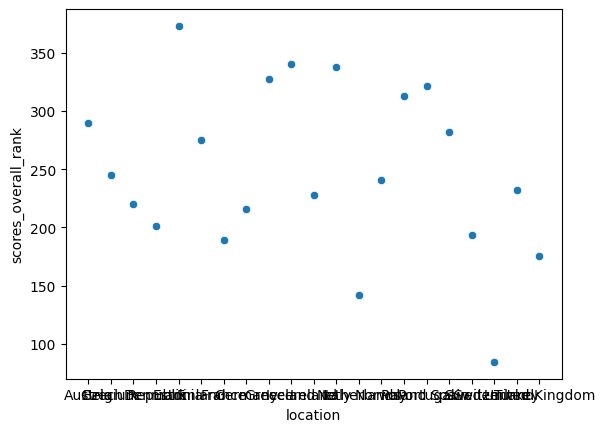

In [139]:
sns.scatterplot(df_ranking.groupby(["year", "location"]).mean().loc[2012]["scores_overall_rank"])

In [140]:
df_ranking.groupby(["year", "location"]).mean().loc[2012]

,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank
location,,,,,,,,,,,,
Austria,47.900000,289.600000,28.440000,266.400000,76.040000,79.600000,38.460000,247.200000,18.840000,322.200000,50.620000,229.000000
Belgium,52.933333,244.857143,30.728571,244.000000,63.671429,133.571429,66.928571,93.714286,32.271429,220.857143,53.757143,214.000000
Czech Republic,NaN,220.000000,32.300000,211.000000,51.400000,191.000000,24.500000,363.000000,24.600000,244.000000,31.000000,339.000000
Denmark,47.700000,201.400000,27.820000,258.600000,71.660000,94.600000,60.800000,111.400000,27.420000,241.000000,57.600000,191.600000
Estonia,NaN,373.000000,17.800000,364.000000,42.000000,240.000000,26.300000,345.000000,17.800000,321.000000,34.400000,327.000000
Finland,54.800000,274.800000,26.320000,280.600000,41.800000,240.200000,41.680000,208.200000,27.220000,245.200000,47.400000,251.000000
France,54.420000,188.750000,35.787500,209.500000,66.462500,120.625000,34.314286,286.000000,22.587500,277.625000,76.575000,110.125000
Germany,49.966667,216.090909,37.368182,183.818182,55.840909,172.772727,42.347619,201.272727,28.150000,239.909091,59.040909,189.272727
Greece,NaN,327.000000,13.100000,396.000000,42.600000,236.000000,33.200000,246.000000,12.600000,376.000000,66.700000,145.000000


In [141]:
df_ranking.loc[2019, "United Kingdom"]

<ipython-input-141-feafca196a60>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_ranking.loc[2019, "United Kingdom"]


scores_overall  scores_overall_rank  scores_teaching  \
year location                                                               
2019 United Kingdom            96.0                   10             91.8   
     United Kingdom            94.8                   20             92.1   
     United Kingdom            90.3                   90             85.8   
     United Kingdom            87.8                  140             79.1   
     United Kingdom            81.3                  260             71.0   
...                             ...                  ...              ...   
     United Kingdom            19.0                 9770             15.4   
     United Kingdom             9.8                10300             14.7   
     United Kingdom             9.8                10320             15.6   
     United Kingdom             9.8                10360             16.3   
     United Kingdom             9.8                11280             14.5   

                     scores_teaching_rank  scores_international_outlook  \
year location                                                             
2019 United Kingdom                     5                          96.3   
     United Kingdom                     3                          94.3   
     United Kingdom                    13                          97.1   
     United Kingdom                    22                          95.8   
     United Kingdom                    32                          92.5   
...                                   ...                           ...   
     United Kingdom                  1111                          52.6   
     United Kingdom                  1152                          57.9   
     United Kingdom                  1092                          42.5   
     United Kingdom                  1049                          43.2   
     United Kingdom                  1169                          71.3   

                     scores_international_outlook_rank  \
year location                                            
2019 United Kingdom                                 19   
     United Kingdom                                 39   
     United Kingdom                                 15   
     United Kingdom                                 27   
     United Kingdom                                 61   
...                                                ...   
     United Kingdom                                464   
     United Kingdom                                388   
     United Kingdom                                647   
     United Kingdom                                638   
     United Kingdom                                242   

                     scores_industry_income  scores_industry_income_rank  \
year location                                                              
2019 United Kingdom                    67.0                          157   
     United Kingdom                    52.9                          269   
     United Kingdom                    67.3                          154   
     United Kingdom                    42.4                          489   
     United Kingdom                    34.8                         1045   
...                                     ...                          ...   
     United Kingdom                    34.3                         1135   
     United Kingdom                    34.3                         1119   
     United Kingdom                    34.0                         1199   
     United Kingdom                    35.1                          996   
     United Kingdom                    34.5                         1086   

                     scores_research  scores_research_rank  scores_citations  \
year location                                                                  
2019 United Kingdom             99.5                     1              99.1   
     United Kingdom             98.8                     2 

In [142]:
df_ranking.loc[2012, "Czech Republic"]

<ipython-input-142-5cae080159a3>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_ranking.loc[2012, "Czech Republic"]


,,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank
year,location,,,,,,,,,,,,
2012,Czech Republic,NaN,220,32.3,211,51.4,191,24.5,363,24.6,244,31.0,339


In [143]:
df_ranking.groupby(["year", "location"]).mean().loc[2012]["scores_overall_rank"].sort_values()

location
Switzerland        84.428571
Netherlands       142.000000
United Kingdom    175.230769
France            188.750000
Sweden            193.500000
Denmark           201.400000
Germany           216.090909
Czech Republic    220.000000
Ireland           228.000000
Turkey            232.500000
Norway            240.250000
Belgium           244.857143
Finland           274.800000
Spain             282.000000
Austria           289.600000
Poland            313.000000
Portugal          321.000000
Greece            327.000000
Italy             337.428571
Iceland           340.000000
Estonia           373.000000
Name: scores_overall_rank, dtype: float64

# JOINED DATASET

In [144]:
df_mean_ranking = df_ranking.groupby(["year", "location"]).mean()

In [145]:
df_mean_ranking.loc[2012]["scores_overall_rank"].sort_values()

location
Switzerland        84.428571
Netherlands       142.000000
United Kingdom    175.230769
France            188.750000
Sweden            193.500000
Denmark           201.400000
Germany           216.090909
Czech Republic    220.000000
Ireland           228.000000
Turkey            232.500000
Norway            240.250000
Belgium           244.857143
Finland           274.800000
Spain             282.000000
Austria           289.600000
Poland            313.000000
Portugal          321.000000
Greece            327.000000
Italy             337.428571
Iceland           340.000000
Estonia           373.000000
Name: scores_overall_rank, dtype: float64

In [146]:
df_mean_ranking.index

MultiIndex([(2012,        'Austria'),
            (2012,        'Belgium'),
            (2012, 'Czech Republic'),
            (2012,        'Denmark'),
            (2012,        'Estonia'),
            (2012,        'Finland'),
            (2012,         'France'),
            (2012,        'Germany'),
            (2012,         'Greece'),
            (2012,        'Iceland'),
            ...
            (2019,       'Portugal'),
            (2019,        'Romania'),
            (2019,         'Serbia'),
            (2019,       'Slovakia'),
            (2019,       'Slovenia'),
            (2019,          'Spain'),
            (2019,         'Sweden'),
            (2019,    'Switzerland'),
            (2019,         'Turkey'),
            (2019, 'United Kingdom')],
           names=['year', 'location'], length=208)

In [147]:
df_mobility.groupby(["year", "geo"]).sum()

<ipython-input-147-aa2a7c8bfc49>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mobility.groupby(["year", "geo"]).sum()


value
year geo                      
2012 Bulgaria          11364.0
     Germany          198494.0
     Switzerland       55590.0
2013 Austria         1037170.0
     Belgium          611092.0
...                        ...
2019 Spain           1208148.0
     Sweden           491395.0
     Switzerland      874684.0
     Turkey          2433328.0
     United Kingdom  7700316.0

[248 rows x 1 columns]

In [148]:
df_mobility.groupby("year").count()

,isced11,isced13,sex,geo,value
year,,,,,
2012,6,6,6,6,6
2013,51191,51191,51191,51191,51191
2014,55597,55597,55597,55597,55597
2015,82304,82304,82304,82304,82304
2016,84403,84403,84403,84403,84403
2017,100675,100675,100675,100675,100675
2018,86068,86068,86068,86068,86068
2019,86495,86495,86495,86495,86495


In [149]:
df_mobility

,isced11,isced13,sex,geo,year,value
0,ED5,F00,F,Austria,2019,0.0
2,ED5,F00,F,Belgium,2019,0.0
4,ED5,F00,F,Switzerland,2019,0.0
5,ED5,F00,F,Cyprus,2019,0.0
6,ED5,F00,F,Czech Republic,2019,0.0
...,...,...,...,...,...,...
876217,ED5-8,TOTAL,T,Switzerland,2012,44468.0
876220,ED5-8,TOTAL,T,Germany,2012,184594.0
947150,ED8,TOTAL,T,Bulgaria,2012,150.0
947151,ED8,TOTAL,T,Switzerland,2012,11122.0


In [150]:
tmp = df_mobility[(df_mobility["isced11"] == "ED5-8") & (df_mobility["isced13"] == "TOTAL")]

In [151]:
tmp[(tmp["year"] == 2019) & (tmp["geo"] == "Austria")]

,isced11,isced13,sex,geo,year,value
47256,ED5-8,TOTAL,F,Austria,2019,40179.0
47293,ED5-8,TOTAL,M,Austria,2019,34452.0
47330,ED5-8,TOTAL,T,Austria,2019,74631.0


In [152]:
tmp.shape

(727, 6)

In [153]:
df_mobility_min = tmp[["geo", "year", "value", "sex"]]

In [154]:
df_mobility_min

,geo,year,value,sex
47256,Austria,2019,40179.0,F
47257,Belgium,2019,30795.0,F
47258,Bulgaria,2019,7453.0,F
47259,Switzerland,2019,27767.0,F
47260,Cyprus,2019,4112.0,F
...,...,...,...,...
757837,Turkey,2013,54387.0,T
757838,United Kingdom,2013,416693.0,T
876216,Bulgaria,2012,11214.0,T
876217,Switzerland,2012,44468.0,T


In [155]:
df_mobility_min.rename({"geo": "location"}, axis="columns", inplace=True)
df_mobility_min.set_index(["year", "location"], inplace=True)

<ipython-input-155-221417fb6cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobility_min.rename({"geo": "location"}, axis="columns", inplace=True)


In [156]:
df_mean_ranking.index

MultiIndex([(2012,        'Austria'),
            (2012,        'Belgium'),
            (2012, 'Czech Republic'),
            (2012,        'Denmark'),
            (2012,        'Estonia'),
            (2012,        'Finland'),
            (2012,         'France'),
            (2012,        'Germany'),
            (2012,         'Greece'),
            (2012,        'Iceland'),
            ...
            (2019,       'Portugal'),
            (2019,        'Romania'),
            (2019,         'Serbia'),
            (2019,       'Slovakia'),
            (2019,       'Slovenia'),
            (2019,          'Spain'),
            (2019,         'Sweden'),
            (2019,    'Switzerland'),
            (2019,         'Turkey'),
            (2019, 'United Kingdom')],
           names=['year', 'location'], length=208)

In [157]:
df_mobility_min.index

MultiIndex([(2019,        'Austria'),
            (2019,        'Belgium'),
            (2019,       'Bulgaria'),
            (2019,    'Switzerland'),
            (2019,         'Cyprus'),
            (2019, 'Czech Republic'),
            (2019,        'Germany'),
            (2019,        'Denmark'),
            (2019,        'Estonia'),
            (2019,         'Greece'),
            ...
            (2013,        'Romania'),
            (2013,         'Serbia'),
            (2013,         'Sweden'),
            (2013,       'Slovenia'),
            (2013,       'Slovakia'),
            (2013,         'Turkey'),
            (2013, 'United Kingdom'),
            (2012,       'Bulgaria'),
            (2012,    'Switzerland'),
            (2012,        'Germany')],
           names=['year', 'location'], length=727)

In [158]:
res = df_mobility_min.join(df_mean_ranking, how="inner")
res["value"] = res["value"] / 1000

In [159]:
res

value sex  scores_overall  scores_overall_rank  \
year location                                                           
2012 Germany         184.594   T       49.966667           216.090909   
     Switzerland      44.468   T       59.785714            84.428571   
2013 Austria          37.778   F       50.200000           285.333333   
     Austria          33.077   M       50.200000           285.333333   
     Austria          70.855   T       50.200000           285.333333   
...                      ...  ..             ...                  ...   
2019 Turkey          100.220   M       18.873913          8746.956522   
     Turkey          154.505   T       18.873913          8746.956522   
     United Kingdom  265.354   F       41.401020          4536.428571   
     United Kingdom  223.665   M       41.401020          4536.428571   
     United Kingdom  489.019   T       41.401020          4536.428571   

                     scores_teaching  scores_teaching_rank  \
year location                                                
2012 Germany               37.368182            183.818182   
     Switzerland           47.600000            126.428571   
2013 Austria               33.050000            249.833333   
     Austria               33.050000            249.833333   
     Austria               33.050000            249.833333   
...                              ...                   ...   
2019 Turkey                18.973913            922.869565   
     Turkey                18.973913            922.869565   
     United Kingdom        28.861224            657.234694   
     United Kingdom        28.861224            657.234694   
     United Kingdom        28.861224            657.234694   

                     scores_international_outlook  \
year location                                       
2012 Germany                            55.840909   
     Switzerland                        91.142857   
2013 Austria                            71.883333   
     Austria                            71.883333   
     Austria                            71.883333   
...                                           ...   
2019 Turkey                             29.178261   
     Turkey                             29.178261   
     United Kingdom                     79.466327   
     United Kingdom                     79.466327   
     United Kingdom                     79.466327   

                     scores_international_outlook_rank  \
year location                                            
2012 Germany                                172.772727   
     Switzerland                             20.857143   
2013 Austria                                 87.000000   
     Austria                                 87.000000   
     Austria                                 87.000000   
...                                                ...   
2019 Turkey                                 924.434783   
     Turkey                                 924.434783   
     United Kingdom                         179.632653   
     United Kingdom                         179.632653   
     United Kingdom                         179.632653   

                     scores_industry_income  scores_industry_income_rank  \
year location                                                              
2012 Germany                      42.347619                   201.272727   
     Switzerland                  41.666667                   195.714286   
2013 Austria                      39.100000                   281.000000   
     Austria                      39.100000                   281.000000   
     Austria                      39.100000                   281.000000   
...                                     ...                          ...   
2019 Turkey                       57.465217                   482.826087   
     Turkey                       57.465217                   482.826087   
     United Kingdom               37.646939                  

# BOKEH Dashboard

In [160]:
from bokeh.io import output_notebook, show, output_file
from bokeh.layouts import gridplot, row, layout
from bokeh.models import CDSView, ColumnDataSource, GroupFilter, \
  GeoJSONDataSource, LinearColorMapper, ColorBar, Range1d, Div
from bokeh.plotting import figure
from bokeh.transform import factor_cmap, dodge
import geopandas as gpd
from bokeh.palettes import Blues as palette, Colorblind
from bokeh.models.widgets import Select


output_notebook()

## sum of mobile students per year per gender

In [161]:
year_gender = res.reset_index().groupby(["year", "sex"])["value"].sum().reset_index().pivot(index='sex', columns='year', values='value')

In [162]:
year_gender.drop(2012, axis="columns", inplace=True)

In [163]:
def barplot(year_gender):
  col = Colorblind[3]
  labs = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
  vals = ['M', 'F','T']
  my_data = ColumnDataSource(data=dict(labs=labs,
                                      M=year_gender.loc["M"].values,
                                      F=year_gender.loc["F"].values,
                                      T=year_gender.loc["T"].values))
  barplot = figure(x_range = labs, width=600, height = 350,
                   title="Mobile Students per Year and Sex",
                   x_axis_label="Year",
                   y_axis_label="Mobile Students in Thousands")

  barplot.vbar(x = dodge('labs', -0.25, range = barplot.x_range), top = 'M',
  width = 0.2,source = my_data, color = col[0], legend_label="Male")
  barplot.vbar(x = dodge('labs', 0.0, range = barplot.x_range), top = 'F',
  width = 0.2, source = my_data,color = col[1], legend_label="Female")
  barplot.vbar(x = dodge('labs', 0.25, range = barplot.x_range), top = 'T',
  width = 0.2,source = my_data,color = col[2], legend_label="Total")
  barplot.add_layout(barplot.legend[0], 'right')
  return barplot

## mean value of number of students per country


In [164]:
total_students = res[res["sex"] == "T"].reset_index()
loc_value_mean = total_students.groupby("location")[["location", "value"]].mean().reset_index()
loc_value_mean["name"] = loc_value_mean["location"]

<ipython-input-164-4f9f8064a68d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loc_value_mean = total_students.groupby("location")[["location", "value"]].mean().reset_index()


In [172]:
def europe_map(df):
  ## TODO configure pallette
  #obtain countries shapes
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
  europe = (world.loc[world["continent"] == "Europe"])

  europe = europe[europe["name"] != "Russia"]

  europe["name"].replace({"Czechia":"Czech Republic"}, inplace=True)

  new = pd.merge(europe, df, on="name", how="outer")
  new.dropna(inplace=True)

  geo_source = GeoJSONDataSource(geojson=new.to_json())

  TOOLS = "pan,wheel_zoom,box_zoom,reset"
  TOOLTIPS = [
      ("country", "@name"),
      ("students", "@value")
  ]

  p = figure(title="Mobile Students in Europe", x_range=(-30,40), y_range=(30,85), tooltips=TOOLTIPS,
             width=450, height=350, tools=TOOLS)
  pal = palette[9][::-1]
  mapper = LinearColorMapper(palette=pal[3:], low=new["value"].min(), high=new["value"].max())

  p.patches("xs", "ys", fill_alpha=0.7,
  fill_color={"field": "value", "transform": mapper},
  line_color="black", line_width=0.5, source=geo_source)

  color_bar = ColorBar(color_mapper=mapper, title="Mean Value of Mobile Students in Thousands")
  p.add_layout(color_bar, 'right')

  return p

## rank and mobile students + score and rank

In [166]:
def scatter_joined(df):
  source = ColumnDataSource(data=df)

  TOOLS = "lasso_select,pan,wheel_zoom,box_zoom,box_select,reset,help"

  TOOLTIPS = [
      ("year", "@year"),
      ("value", "@value"),
      ("score", "@scores_overall"),
      ("location", "@location")
  ]

  index_cmap = factor_cmap('sex', palette=list(Colorblind[3]),
                          factors=["Male", "Female", "Total"])

  # create a new plot and add a renderer
  left = figure(tools=TOOLS, width=800, height=300, tooltips=TOOLTIPS,
                title="Mean University Ranking and Mobile Students per Country and Sex",
                x_axis_label="Mean University Ranking",
                y_axis_label="Mobile Students in Thousands")
  left.scatter('scores_overall_rank', 'value', source=source, legend_group='sex',
              fill_color=index_cmap, line_color=index_cmap)
  left.add_layout(left.legend[0], 'right')

  right = figure(tools=TOOLS, width=700, height=300, tooltips=TOOLTIPS,
                title="Mean University Ranking vs. Mean Internatioanal Outlook Score",
                x_axis_label="Mean University Ranking",
                y_axis_label="Mean International Outlook Score")

  right.scatter('scores_overall_rank', 'scores_international_outlook', source=source)

  p = gridplot([[left, right]])
  return p

## mean of international outlook over time

In [167]:
international_mean = res.reset_index().groupby(["year"])["scores_international_outlook"].mean()

In [168]:
international_mean

year
2012    73.491883
2013    55.519831
2014    58.593573
2015    60.618764
2016    54.226904
2017    53.479570
2018    55.911442
2019    55.901464
Name: scores_international_outlook, dtype: float64

In [169]:
international_mean.values

array([73.49188312, 55.51983125, 58.593573  , 60.61876432, 54.22690428,
       53.47956998, 55.91144167, 55.90146368])

In [170]:
def lineplot(df):
  x = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
  p = figure(title="Mean International Outlook Score over Time",
             x_axis_label='Year', width=450, height=350,
             y_axis_label='Mean International Outlook Score')
  p.y_range = Range1d(0, 100)
  p.line(x, df.values, line_width=2)
  return p

## COMBINED

In [173]:
output_file("dashboard.html")

## number of mobile students per year per gender
bar = barplot(year_gender)

## europe map
map = europe_map(loc_value_mean)

## scatterplots
df = res.reset_index()
df["sex"].replace({"F": "Female", "M": "Male", "T": "Total"}, inplace=True)

p = scatter_joined(df)

## lineplot
score = lineplot(international_mean[1:])

div = Div(text="""<h1> Mobility of Students in Europe </h1>""", height=20)
l = layout([
    [div],
    [p],
    [map, bar, score]
])

show(l)

<ipython-input-172-f3b747d25e57>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
